In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('http://rcs.bu.edu/examples/python/data_analysis/Salaries.csv')

In [3]:
df.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


## logistic regression
In this furst project, let apply logistic regression to predict if a person is male or female based on the feautres
phd,service and salary

In [4]:
df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [5]:
# find the number of female and male
df.sex.value_counts()

Female    39
Male      39
Name: sex, dtype: int64

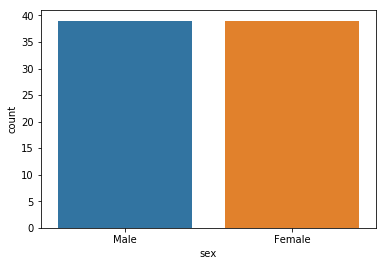

In [6]:
# make a plot for the number of male and female 
sns.countplot(df['sex'],data=df)

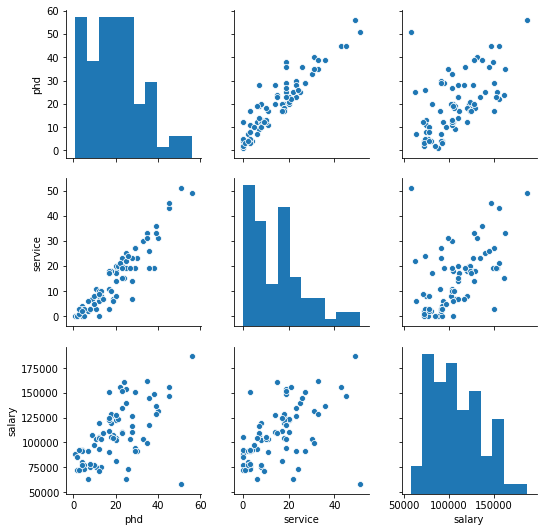

In [7]:
# plot a graph for all the features data
sns.pairplot(df)
plt.show()

### let us explore the our data

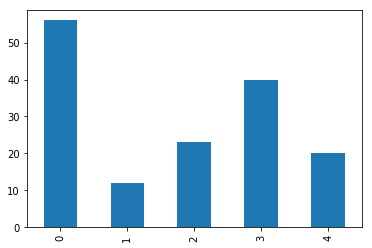

In [8]:
df['phd'].head().plot(kind = 'bar')

In [9]:
# le change the categorical data into numerical one meaning we are changing male by 0 and female by 1
df['sex'] = pd.get_dummies(df['sex'])

In [10]:
df.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,0,186960
1,Prof,A,12,6,0,93000
2,Prof,A,23,20,0,110515
3,Prof,A,40,31,0,131205
4,Prof,B,20,18,0,104800


In [11]:
# features selected
X = df.drop(['rank','discipline','sex'],axis = 1).values

In [12]:
# target variable
target = df['sex'].values

In [13]:
X

array([[    56,     49, 186960],
       [    12,      6,  93000],
       [    23,     20, 110515],
       [    40,     31, 131205],
       [    20,     18, 104800],
       [    20,     20, 122400],
       [    20,     17,  81285],
       [    18,     18, 126300],
       [    29,     19,  94350],
       [    51,     51,  57800],
       [    39,     33, 128250],
       [    23,     23, 134778],
       [     1,      0,  88000],
       [    35,     33, 162200],
       [    25,     19, 153750],
       [    17,      3, 150480],
       [     8,      3,  75044],
       [     4,      0,  92000],
       [    19,      7, 107300],
       [    29,     27, 150500],
       [     4,      4,  92000],
       [    33,     30, 103106],
       [     4,      2,  73000],
       [     2,      0,  85000],
       [    30,     23,  91100],
       [    35,     31,  99418],
       [    38,     19, 148750],
       [    45,     43, 155865],
       [     7,      2,  91300],
       [    21,     20, 123683],
       [  

In [14]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [15]:
# let now shufle the target data 
import numpy as np

In [16]:
np.random.shuffle(target)

In [17]:
# let check if the data is shuffled 
target

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1], dtype=uint8)

### importing packages for creating the model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,target,random_state = 0, test_size=.3)

In [20]:
X_train

array([[    25,     22,  62884],
       [     4,      0,  92000],
       [    12,     10, 103994],
       [    13,     10, 103750],
       [    20,     17,  81285],
       [     2,      0,  72500],
       [    12,      9,  71065],
       [    20,     18, 104800],
       [    18,     18, 120000],
       [    12,      0, 105000],
       [     7,      2,  91300],
       [    23,     23, 134778],
       [    10,      5,  97032],
       [     2,      0,  85000],
       [    39,     33, 128250],
       [    22,     21, 155750],
       [     5,      0,  77000],
       [     3,      3,  92000],
       [    12,      6,  93000],
       [    27,     19, 103275],
       [     7,      6,  63100],
       [    25,     19, 153750],
       [     5,      3,  73500],
       [    29,     27, 150500],
       [    21,     20, 123683],
       [    30,     23,  91100],
       [    28,     23, 126933],
       [    19,      7, 107300],
       [    56,     49, 186960],
       [    28,     14, 109954],
       [  

In [21]:
logreg = LogisticRegression()

In [22]:
# training the model
logreg.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
# TIME TO TEST THE MODEL USING X TEST
y_pred = logreg.predict(X_test)

In [24]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

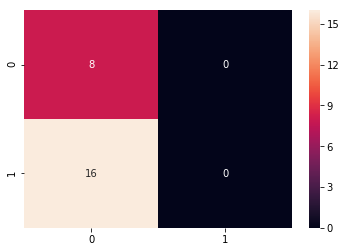

In [25]:
#BY IMPORTING THE CLASSIFICATION REPORT AND CONFUSION MATRIX IT'S POSSIBLE TO SEE HOW WELL THE MODEL WORKED
# THIS WORKS BY COMPARING THE ORIGINAL TEST DATA PREDUCTIONS WITH THE PREDICTIONS BASED ON THE MODEL
#70 OBSERVATIONS FROM THE TEST DATA WERE PROPERLY CLASSIFIED
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True,fmt='d')
plt.show()


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         8
           1       0.00      0.00      0.00        16

   micro avg       0.33      0.33      0.33        24
   macro avg       0.17      0.50      0.25        24
weighted avg       0.11      0.33      0.17        24



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Note:
as we can see here the prediction is not good so can imporve the model